In [1]:
# handling colab problem
import os
if not 'data' in os.listdir('..'):
    print('needs data folder. imports through git')
    !git clone https://github.com/JakartaLaw/speciale.git
    print(os.listdir())
    os.chdir('speciale//src')

In [2]:
from environments import EnvironmentModel1 as Environment
from environments import translate_action_model1 as translate_action
from environments import reward_scaler_model1 as reward_scaler
from environments import STATES_MU1, STATES_SIGMA1
from environments.model1 import scale_states

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [4]:
from agents.new_doubledqnagent import DDQNAgent as Agent

Using TensorFlow backend.


In [5]:
parameters = {
    'beta_L' : 1,
    'sigma_epsilon' : 0.1, 
    'S_min': 120.0,
    'alpha': 4.609,
    'eta_G': 0.164,
    'eta_G_sq' : 0.015,
    'delta': 0.209,
    'sigma_epsilon': 15.11,
    'omega': 3.5,
}

In [6]:
env = Environment(**parameters)
lr = 0.0005
agent = Agent(gamma=0.99, epsilon=1.0, alpha=lr, input_dims=5,
              n_actions=4, mem_size=1000000, batch_size=64, epsilon_dec=0.9999,
              epsilon_end=0.01, state_scaler_mu = STATES_MU1,
              state_scaler_sigma = STATES_SIGMA1)


In [7]:
def draw_beta_L(beta_L_min=0.2, beta_L_max=6.0):
    return np.random.uniform(beta_L_min, beta_L_max)

def transform_action(dqn_action):
    return np.array([0, 25, 37, 45])[dqn_action]

def create_return_array(state, _action, scaled_reward, episode):
    return np.append(state, [_action, scaled_reward, episode])

In [8]:
N_EPISODES = 3000

/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jeppejohansen/.local/share/virtualenvs/speciale-wQK9LG7Y/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode: 0 epsilon: 1.0 total score (last 10): nan


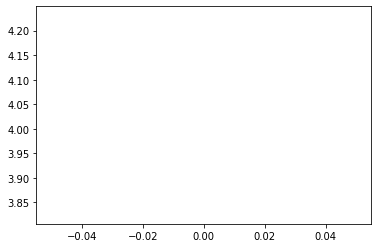

Episode: 10 epsilon: 0.9640599185586783 total score (last 10): 1.8385027695661027
Episode: 20 epsilon: 0.9234819910736651 total score (last 10): 3.0037947483390823
Episode: 30 epsilon: 0.8846120157265657 total score (last 10): 4.1301563613465
Episode: 40 epsilon: 0.847378103668288 total score (last 10): 2.8642637916808744
Episode: 50 epsilon: 0.811711391899535 total score (last 10): 3.6340698703629712


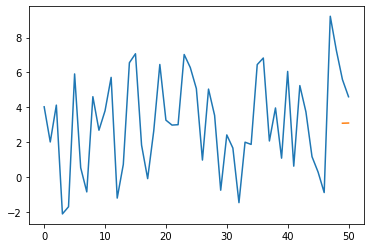

Episode: 60 epsilon: 0.7775459159107581 total score (last 10): 3.838941300423479
Episode: 70 epsilon: 0.7448184876827848 total score (last 10): 3.0447075695992325
Episode: 80 epsilon: 0.713468578822478 total score (last 10): 5.1382486147135555
Episode: 90 epsilon: 0.6834382086172971 total score (last 10): 2.551815782456498
Episode: 100 epsilon: 0.6546718368017131 total score (last 10): 2.3855854199710538


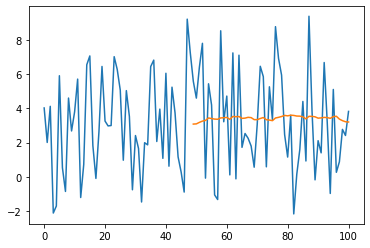

Episode: 110 epsilon: 0.6271162608371637 total score (last 10): 3.59416404704181
Episode: 120 epsilon: 0.600720517515557 total score (last 10): 5.205276119320228
Episode: 130 epsilon: 0.5754357887043543 total score (last 10): 3.717811112559403
Episode: 140 epsilon: 0.5512153110589036 total score (last 10): 3.2825336469277797
Episode: 150 epsilon: 0.5280142895350369 total score (last 10): 3.9360438457378177


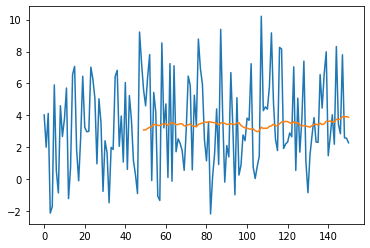

Episode: 160 epsilon: 0.5057898145419926 total score (last 10): 4.28205701309907
Episode: 170 epsilon: 0.484500782582415 total score (last 10): 6.682475627656408
Episode: 180 epsilon: 0.46410782023267466 total score (last 10): 5.249448248012747
Episode: 190 epsilon: 0.4445732113229038 total score (last 10): 4.656578997595319
Episode: 200 epsilon: 0.4258608271820816 total score (last 10): 3.839822211208317


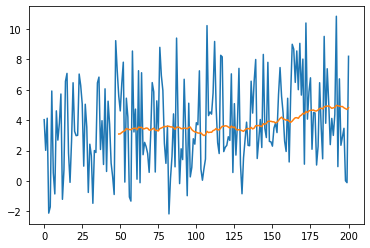

Episode: 210 epsilon: 0.4079360598191387 total score (last 10): 4.537690139950644
Episode: 220 epsilon: 0.3907657579165237 total score (last 10): 3.8917361322786355
Episode: 230 epsilon: 0.3743181655178378 total score (last 10): 5.691908311681668
Episode: 240 epsilon: 0.3585628632961515 total score (last 10): 3.934038571013523
Episode: 250 epsilon: 0.3434707122943729 total score (last 10): 4.686251403141306


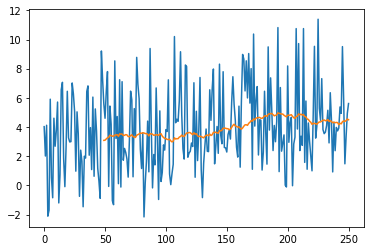

Episode: 260 epsilon: 0.3290138000336249 total score (last 10): 4.1532918336164535
Episode: 270 epsilon: 0.3151653888899552 total score (last 10): 7.061402194650136
Episode: 280 epsilon: 0.3018998666439078 total score (last 10): 7.4021111175557985
Episode: 290 epsilon: 0.2891926991114924 total score (last 10): 7.762662941436046
Episode: 300 epsilon: 0.2770203847689501 total score (last 10): 4.419464777571553


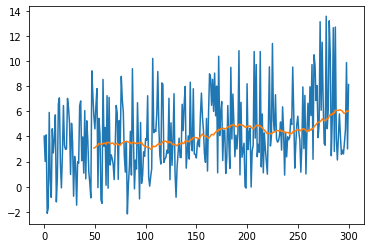

Episode: 310 epsilon: 0.2653604112873939 total score (last 10): 7.739899855965971
Episode: 320 epsilon: 0.2541912138969337 total score (last 10): 3.103274624747063
Episode: 330 epsilon: 0.24349213550328125 total score (last 10): 4.421847992362624
Episode: 340 epsilon: 0.23324338848308065 total score (last 10): 7.557782476337954
Episode: 350 epsilon: 0.22342601808729118 total score (last 10): 6.946972401210308


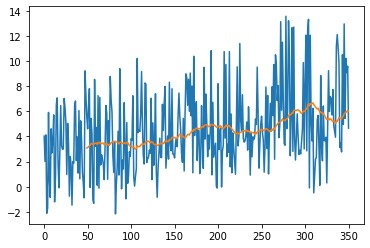

Episode: 360 epsilon: 0.21402186738495152 total score (last 10): 5.039293414189215
Episode: 370 epsilon: 0.20501354368248126 total score (last 10): 7.6533465329874355
Episode: 380 epsilon: 0.19638438635641947 total score (last 10): 5.319664591036828
Episode: 390 epsilon: 0.18811843604010126 total score (last 10): 8.133083663334714
Episode: 400 epsilon: 0.180200405107292 total score (last 10): 6.844146443960766


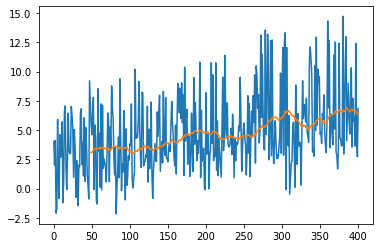

Episode: 410 epsilon: 0.17261564939817997 total score (last 10): 4.8122828420922446
Episode: 420 epsilon: 0.16535014113544708 total score (last 10): 10.027601178834674
Episode: 430 epsilon: 0.1583904429803137 total score (last 10): 6.913571026077273
Episode: 440 epsilon: 0.15172368318058757 total score (last 10): 7.183356940870037
Episode: 450 epsilon: 0.14533753176474418 total score (last 10): 5.167155546627959


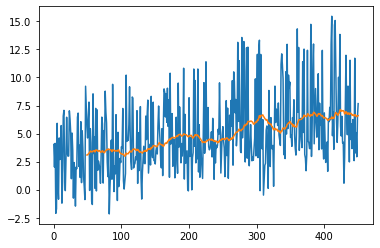

Episode: 460 epsilon: 0.13922017773801795 total score (last 10): 7.524619791710259
Episode: 470 epsilon: 0.13336030723831901 total score (last 10): 4.841037751911061
Episode: 480 epsilon: 0.12774708261159037 total score (last 10): 6.591126603147279
Episode: 490 epsilon: 0.12237012236789019 total score (last 10): 9.588709366253376
Episode: 500 epsilon: 0.11721948198113886 total score (last 10): 9.570261230866363


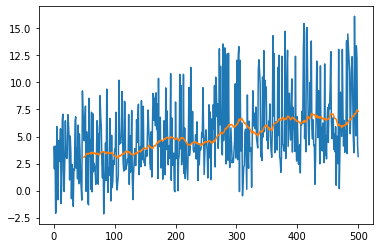

Episode: 510 epsilon: 0.11228563549701923 total score (last 10): 5.903114806790588
Episode: 520 epsilon: 0.107559457915009 total score (last 10): 8.690851161468936
Episode: 530 epsilon: 0.10303220831196792 total score (last 10): 7.758211472841664
Episode: 540 epsilon: 0.09869551367606369 total score (last 10): 8.231594513410407
Episode: 550 epsilon: 0.09454135342113795 total score (last 10): 9.326358805297271


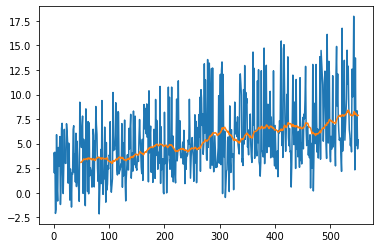

Episode: 560 epsilon: 0.09056204455287445 total score (last 10): 7.470004359490621
Episode: 570 epsilon: 0.08675022745933204 total score (last 10): 7.1491378174867215
Episode: 580 epsilon: 0.08309885229956374 total score (last 10): 7.303055818131485
Episode: 590 epsilon: 0.07960116596514924 total score (last 10): 6.706032150965957
Episode: 600 epsilon: 0.07625069959052229 total score (last 10): 6.8311945885646725


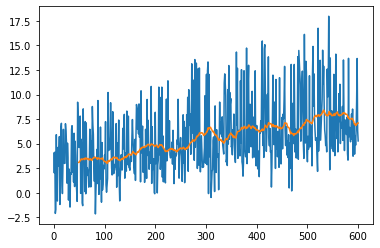

Episode: 610 epsilon: 0.07304125658900062 total score (last 10): 7.588512267078668
Episode: 620 epsilon: 0.06996690119238395 total score (last 10): 8.283630535930719
Episode: 630 epsilon: 0.06702194747293001 total score (last 10): 6.57163799747298
Episode: 640 epsilon: 0.06420094882740288 total score (last 10): 6.493275202294182
Episode: 650 epsilon: 0.0614986879037436 total score (last 10): 7.155165534030053


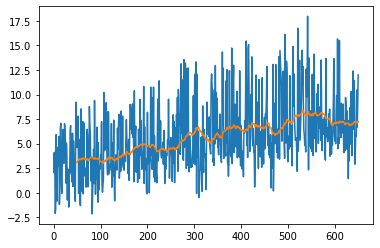

Episode: 660 epsilon: 0.05891016695173428 total score (last 10): 7.5062791875294455
Episode: 670 epsilon: 0.05643059857981053 total score (last 10): 7.776867932892973
Episode: 680 epsilon: 0.05405539690092427 total score (last 10): 6.6287393840421736
Episode: 690 epsilon: 0.051780169051084124 total score (last 10): 9.836432541450485
Episode: 700 epsilon: 0.049600707064885216 total score (last 10): 7.2658887613355


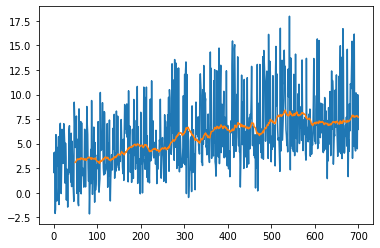

Episode: 710 epsilon: 0.04751298009300428 total score (last 10): 6.92298514889217
Episode: 720 epsilon: 0.045513126947264976 total score (last 10): 6.97942401604379
Episode: 730 epsilon: 0.043597448959486536 total score (last 10): 9.022492477711141
Episode: 740 epsilon: 0.04176240314090865 total score (last 10): 6.8550610453167025
Episode: 750 epsilon: 0.0400045956295402 total score (last 10): 8.371004107295668


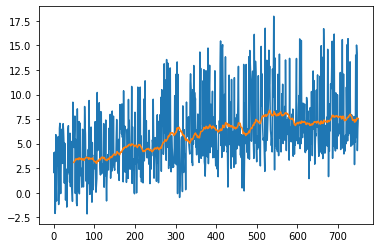

Episode: 760 epsilon: 0.03832077541331378 total score (last 10): 8.210357138830567
Episode: 770 epsilon: 0.036707828317436506 total score (last 10): 8.100139255167456
Episode: 780 epsilon: 0.035162771244817856 total score (last 10): 6.190562074808645
Episode: 790 epsilon: 0.033682746658921174 total score (last 10): 7.6531042950066945
Episode: 800 epsilon: 0.032265017298836234 total score (last 10): 8.231452491819061


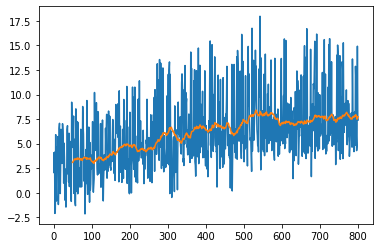

Episode: 810 epsilon: 0.030906961116796926 total score (last 10): 7.019106501023895
Episode: 820 epsilon: 0.02960606642878365 total score (last 10): 7.892189934218329
Episode: 830 epsilon: 0.028359927269238718 total score (last 10): 7.22842338571902
Episode: 840 epsilon: 0.027166238941305806 total score (last 10): 6.45129493964825
Episode: 850 epsilon: 0.026022793754362495 total score (last 10): 8.202104383612987


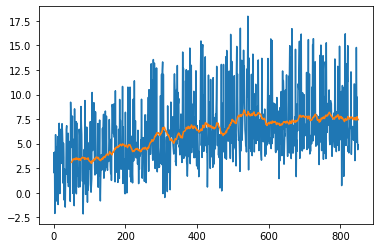

Episode: 860 epsilon: 0.024927476940962916 total score (last 10): 8.756972281757506
Episode: 870 epsilon: 0.02387826274563886 total score (last 10): 8.817308055083416
Episode: 880 epsilon: 0.02287321067832622 total score (last 10): 6.923956436386331
Episode: 890 epsilon: 0.021910461925487082 total score (last 10): 8.541524042651874
Episode: 900 epsilon: 0.020988235912289925 total score (last 10): 8.06344977106188


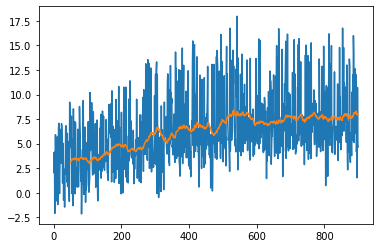

Episode: 910 epsilon: 0.020104827009490085 total score (last 10): 6.924519453675665
Episode: 920 epsilon: 0.019258601378919812 total score (last 10): 8.086860913724578
Episode: 930 epsilon: 0.018447993951753932 total score (last 10): 9.12951241070923
Episode: 940 epsilon: 0.017671505533962 total score (last 10): 9.249971994047149
Episode: 950 epsilon: 0.016927700033594142 total score (last 10): 6.391558864514703


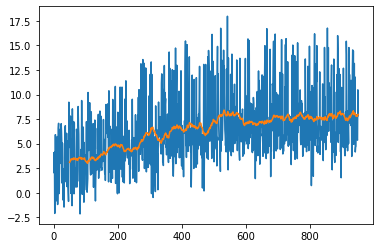

Episode: 960 epsilon: 0.01621520180477221 total score (last 10): 7.471892457496202
Episode: 970 epsilon: 0.015532693103474243 total score (last 10): 10.152696239518114
Episode: 980 epsilon: 0.01487891165040641 total score (last 10): 8.938987952000234
Episode: 990 epsilon: 0.014252648296455585 total score (last 10): 9.12734541478444
Episode: 1000 epsilon: 0.013652744786404457 total score (last 10): 8.517138396111253


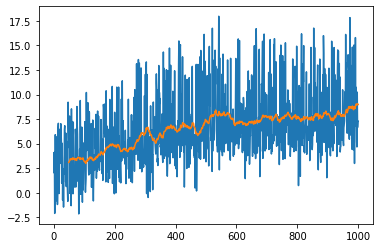

Episode: 1010 epsilon: 0.013078091616773296 total score (last 10): 8.47511035865201
Episode: 1020 epsilon: 0.012527625983826755 total score (last 10): 6.952055965642781
Episode: 1030 epsilon: 0.012000329817950373 total score (last 10): 7.488261482940991
Episode: 1040 epsilon: 0.011495227900761405 total score (last 10): 8.720295756138862
Episode: 1050 epsilon: 0.011011386061471829 total score (last 10): 7.798918939778023


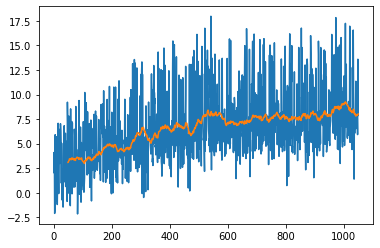

Episode: 1060 epsilon: 0.010547909449167578 total score (last 10): 8.982951169141016
Episode: 1070 epsilon: 0.01010394087780874 total score (last 10): 7.600689630304256
Episode: 1080 epsilon: 0.01 total score (last 10): 7.079419189357422
Episode: 1090 epsilon: 0.01 total score (last 10): 9.550036576638611
Episode: 1100 epsilon: 0.01 total score (last 10): 8.735892351942772


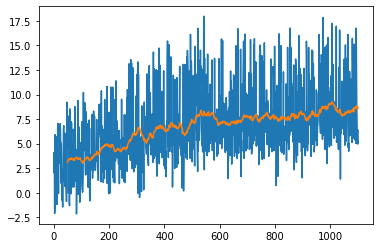

Episode: 1110 epsilon: 0.01 total score (last 10): 7.743849731564641
Episode: 1120 epsilon: 0.01 total score (last 10): 8.258382122094932
Episode: 1130 epsilon: 0.01 total score (last 10): 7.19476391244137
Episode: 1140 epsilon: 0.01 total score (last 10): 8.738420477709465
Episode: 1150 epsilon: 0.01 total score (last 10): 6.883937676533916


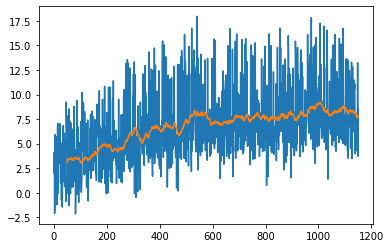

Episode: 1160 epsilon: 0.01 total score (last 10): 6.363433640955921
Episode: 1170 epsilon: 0.01 total score (last 10): 6.3597956961390105
Episode: 1180 epsilon: 0.01 total score (last 10): 9.542648064888589
Episode: 1190 epsilon: 0.01 total score (last 10): 6.7679950293313444
Episode: 1200 epsilon: 0.01 total score (last 10): 8.457613678218689


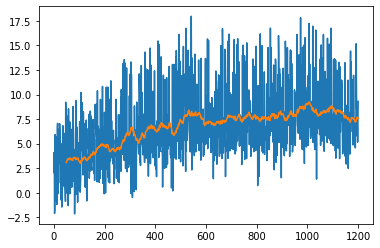

Episode: 1210 epsilon: 0.01 total score (last 10): 7.801280257245466
Episode: 1220 epsilon: 0.01 total score (last 10): 8.375321006222585
Episode: 1230 epsilon: 0.01 total score (last 10): 9.834744967011554
Episode: 1240 epsilon: 0.01 total score (last 10): 9.203180666144952
Episode: 1250 epsilon: 0.01 total score (last 10): 8.41687565731239


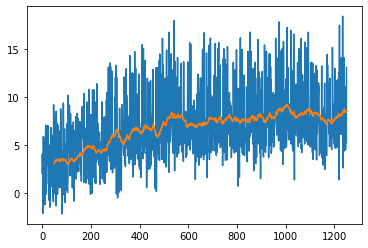

Episode: 1260 epsilon: 0.01 total score (last 10): 8.134157650313076
Episode: 1270 epsilon: 0.01 total score (last 10): 9.744386895355264
Episode: 1280 epsilon: 0.01 total score (last 10): 7.234580992514767
Episode: 1290 epsilon: 0.01 total score (last 10): 11.50844362609152
Episode: 1300 epsilon: 0.01 total score (last 10): 10.025006474051194


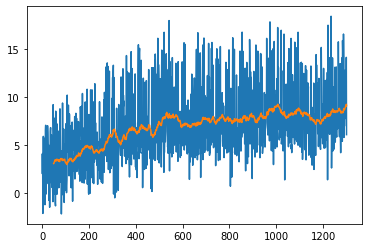

Episode: 1310 epsilon: 0.01 total score (last 10): 6.809363128691199
Episode: 1320 epsilon: 0.01 total score (last 10): 9.819478654331114
Episode: 1330 epsilon: 0.01 total score (last 10): 8.865489097802651
Episode: 1340 epsilon: 0.01 total score (last 10): 8.119955123826765
Episode: 1350 epsilon: 0.01 total score (last 10): 8.405352962797613


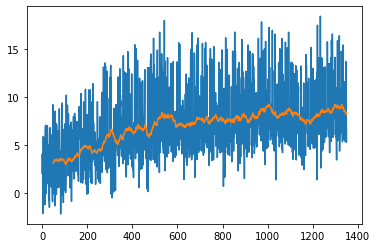

Episode: 1360 epsilon: 0.01 total score (last 10): 7.297313930463135
Episode: 1370 epsilon: 0.01 total score (last 10): 8.336696855200287
Episode: 1380 epsilon: 0.01 total score (last 10): 7.041897892558309
Episode: 1390 epsilon: 0.01 total score (last 10): 7.361679754326739
Episode: 1400 epsilon: 0.01 total score (last 10): 7.976703658486492


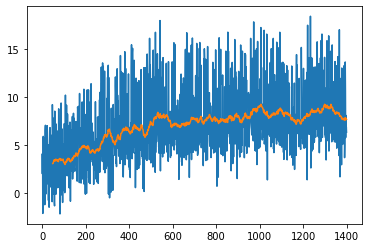

Episode: 1410 epsilon: 0.01 total score (last 10): 7.601980663691953
Episode: 1420 epsilon: 0.01 total score (last 10): 7.0361515947370314
Episode: 1430 epsilon: 0.01 total score (last 10): 9.299469787079687
Episode: 1440 epsilon: 0.01 total score (last 10): 9.341592840089643
Episode: 1450 epsilon: 0.01 total score (last 10): 8.364587389768857


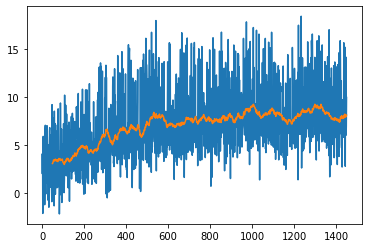

Episode: 1460 epsilon: 0.01 total score (last 10): 7.773047654069523
Episode: 1470 epsilon: 0.01 total score (last 10): 9.31045693311242
Episode: 1480 epsilon: 0.01 total score (last 10): 8.222139821769254
Episode: 1490 epsilon: 0.01 total score (last 10): 7.4777309898098645
Episode: 1500 epsilon: 0.01 total score (last 10): 9.124344643279196


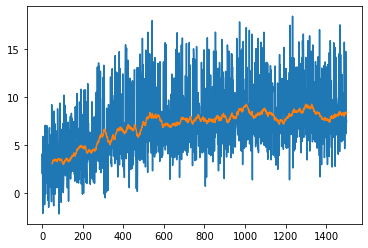

Episode: 1510 epsilon: 0.01 total score (last 10): 8.211728332465007
Episode: 1520 epsilon: 0.01 total score (last 10): 8.860414750235721
Episode: 1530 epsilon: 0.01 total score (last 10): 7.582813472886043
Episode: 1540 epsilon: 0.01 total score (last 10): 8.334989579766793
Episode: 1550 epsilon: 0.01 total score (last 10): 8.795646698316144


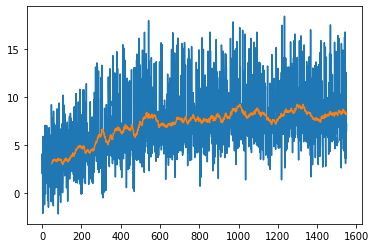

Episode: 1560 epsilon: 0.01 total score (last 10): 7.416746314302746
Episode: 1570 epsilon: 0.01 total score (last 10): 7.6965253298563105
Episode: 1580 epsilon: 0.01 total score (last 10): 6.410098231715221
Episode: 1590 epsilon: 0.01 total score (last 10): 7.412428866413704
Episode: 1600 epsilon: 0.01 total score (last 10): 8.463752640933267


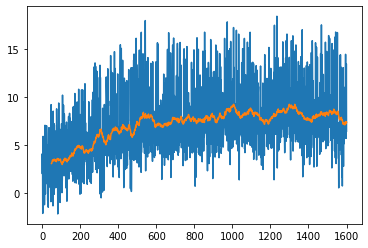

Episode: 1610 epsilon: 0.01 total score (last 10): 10.026420083516804
Episode: 1620 epsilon: 0.01 total score (last 10): 7.238584387190016
Episode: 1630 epsilon: 0.01 total score (last 10): 6.702780870426047
Episode: 1640 epsilon: 0.01 total score (last 10): 11.399482326818045
Episode: 1650 epsilon: 0.01 total score (last 10): 8.04680868329697


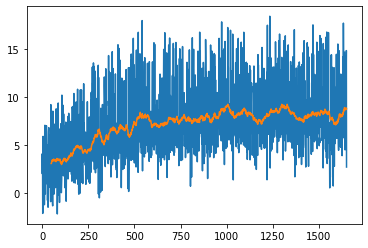

Episode: 1660 epsilon: 0.01 total score (last 10): 5.487310385813792
Episode: 1670 epsilon: 0.01 total score (last 10): 6.7377653206690695
Episode: 1680 epsilon: 0.01 total score (last 10): 9.54345137759528
Episode: 1690 epsilon: 0.01 total score (last 10): 7.465352228463995
Episode: 1700 epsilon: 0.01 total score (last 10): 7.736043698679737


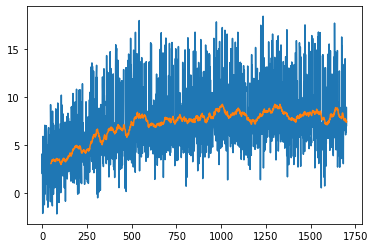

Episode: 1710 epsilon: 0.01 total score (last 10): 6.772283357446794
Episode: 1720 epsilon: 0.01 total score (last 10): 11.354710436319273
Episode: 1730 epsilon: 0.01 total score (last 10): 9.400350904437325
Episode: 1740 epsilon: 0.01 total score (last 10): 8.609676416784694
Episode: 1750 epsilon: 0.01 total score (last 10): 8.11535005078829


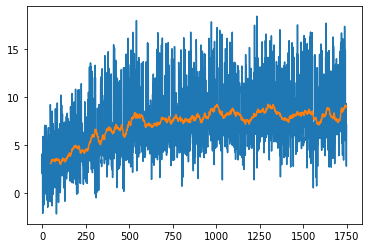

Episode: 1760 epsilon: 0.01 total score (last 10): 9.111729243984737
Episode: 1770 epsilon: 0.01 total score (last 10): 8.195376126009005
Episode: 1780 epsilon: 0.01 total score (last 10): 8.493817359249608
Episode: 1790 epsilon: 0.01 total score (last 10): 8.694027032511942
Episode: 1800 epsilon: 0.01 total score (last 10): 7.334322035492434


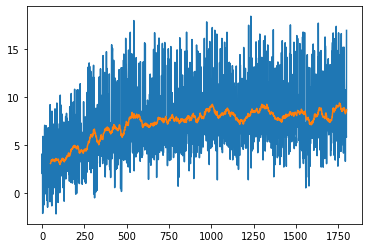

Episode: 1810 epsilon: 0.01 total score (last 10): 8.94968780899584
Episode: 1820 epsilon: 0.01 total score (last 10): 8.58104523135408
Episode: 1830 epsilon: 0.01 total score (last 10): 8.152615088801939
Episode: 1840 epsilon: 0.01 total score (last 10): 9.300642973371133
Episode: 1850 epsilon: 0.01 total score (last 10): 5.593677424646552


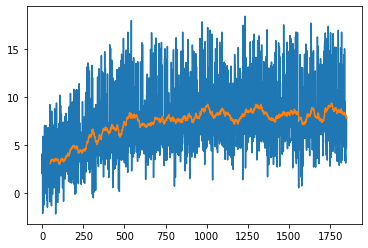

Episode: 1860 epsilon: 0.01 total score (last 10): 8.706448158609579
Episode: 1870 epsilon: 0.01 total score (last 10): 7.573286841213764
Episode: 1880 epsilon: 0.01 total score (last 10): 6.925980991603534
Episode: 1890 epsilon: 0.01 total score (last 10): 8.695684180004204
Episode: 1900 epsilon: 0.01 total score (last 10): 8.040227643720597


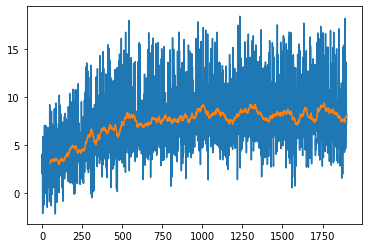

Episode: 1910 epsilon: 0.01 total score (last 10): 6.882437496430464
Episode: 1920 epsilon: 0.01 total score (last 10): 7.241455544124063
Episode: 1930 epsilon: 0.01 total score (last 10): 6.635607159676782
Episode: 1940 epsilon: 0.01 total score (last 10): 7.990843977372076
Episode: 1950 epsilon: 0.01 total score (last 10): 6.313175677008987


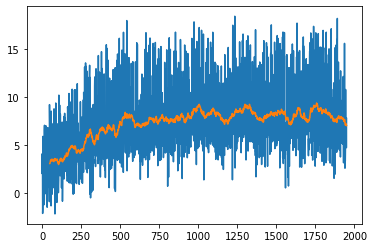

Episode: 1960 epsilon: 0.01 total score (last 10): 8.334557014254422
Episode: 1970 epsilon: 0.01 total score (last 10): 8.759636424118115
Episode: 1980 epsilon: 0.01 total score (last 10): 6.268946984236159
Episode: 1990 epsilon: 0.01 total score (last 10): 9.755601229099916
Episode: 2000 epsilon: 0.01 total score (last 10): 8.601235641229223


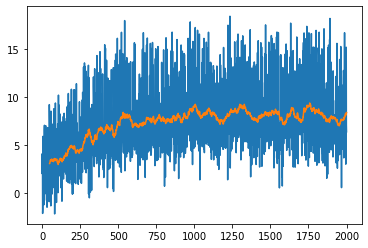

Episode: 2010 epsilon: 0.01 total score (last 10): 8.487978148705377
Episode: 2020 epsilon: 0.01 total score (last 10): 9.271150311568286
Episode: 2030 epsilon: 0.01 total score (last 10): 8.478728067513302
Episode: 2040 epsilon: 0.01 total score (last 10): 7.8469965002741695
Episode: 2050 epsilon: 0.01 total score (last 10): 8.672496170611923


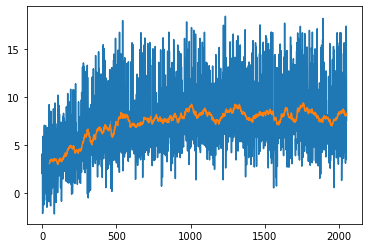

Episode: 2060 epsilon: 0.01 total score (last 10): 9.102286956714638
Episode: 2070 epsilon: 0.01 total score (last 10): 9.57831493391333
Episode: 2080 epsilon: 0.01 total score (last 10): 7.072680941340393
Episode: 2090 epsilon: 0.01 total score (last 10): 7.888912870713325
Episode: 2100 epsilon: 0.01 total score (last 10): 7.5283292485616435


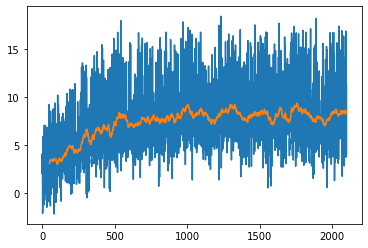

Episode: 2110 epsilon: 0.01 total score (last 10): 7.3797809649925386
Episode: 2120 epsilon: 0.01 total score (last 10): 8.880020490522277
Episode: 2130 epsilon: 0.01 total score (last 10): 7.789760087586365
Episode: 2140 epsilon: 0.01 total score (last 10): 8.421241548725835
Episode: 2150 epsilon: 0.01 total score (last 10): 7.726577819579855


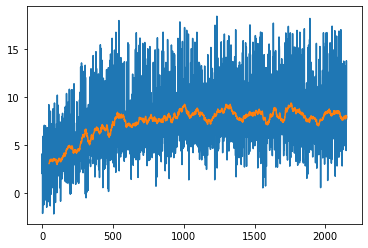

Episode: 2160 epsilon: 0.01 total score (last 10): 8.686497443318412
Episode: 2170 epsilon: 0.01 total score (last 10): 9.517504488189882
Episode: 2180 epsilon: 0.01 total score (last 10): 6.043701513306657
Episode: 2190 epsilon: 0.01 total score (last 10): 9.603669306792607
Episode: 2200 epsilon: 0.01 total score (last 10): 7.445325136683512


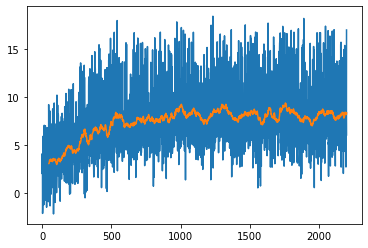

Episode: 2210 epsilon: 0.01 total score (last 10): 10.58458606353557
Episode: 2220 epsilon: 0.01 total score (last 10): 8.005681926344126
Episode: 2230 epsilon: 0.01 total score (last 10): 8.565259705059098
Episode: 2240 epsilon: 0.01 total score (last 10): 8.4538155620444
Episode: 2250 epsilon: 0.01 total score (last 10): 7.494838201253376


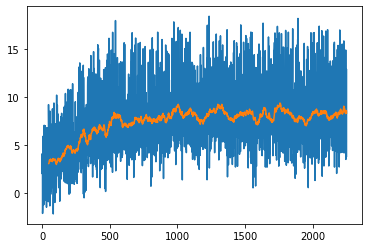

Episode: 2260 epsilon: 0.01 total score (last 10): 8.092979123985957
Episode: 2270 epsilon: 0.01 total score (last 10): 8.350656483491331
Episode: 2280 epsilon: 0.01 total score (last 10): 9.136595970620029
Episode: 2290 epsilon: 0.01 total score (last 10): 8.251052549546632
Episode: 2300 epsilon: 0.01 total score (last 10): 9.86202791563075


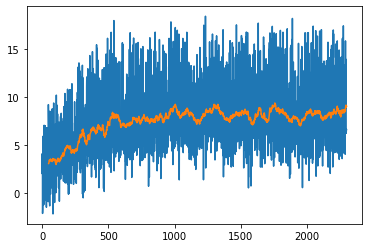

Episode: 2310 epsilon: 0.01 total score (last 10): 6.910907171977582
Episode: 2320 epsilon: 0.01 total score (last 10): 7.421074119391649
Episode: 2330 epsilon: 0.01 total score (last 10): 5.769304878211968
Episode: 2340 epsilon: 0.01 total score (last 10): 8.905816063430269
Episode: 2350 epsilon: 0.01 total score (last 10): 10.406181149827388


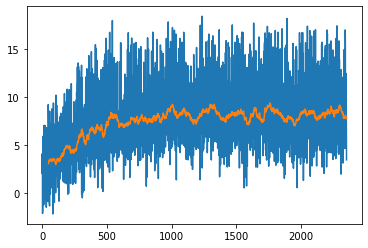

Episode: 2360 epsilon: 0.01 total score (last 10): 6.2280887445508775
Episode: 2370 epsilon: 0.01 total score (last 10): 7.871556298493733
Episode: 2380 epsilon: 0.01 total score (last 10): 7.703098143113566
Episode: 2390 epsilon: 0.01 total score (last 10): 9.090090793736978
Episode: 2400 epsilon: 0.01 total score (last 10): 7.061548797749904


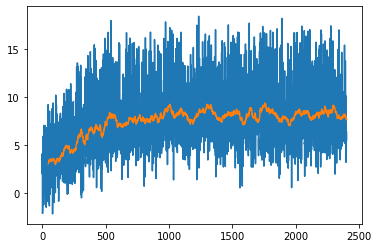

Episode: 2410 epsilon: 0.01 total score (last 10): 8.52622884085329
Episode: 2420 epsilon: 0.01 total score (last 10): 7.850874291177206
Episode: 2430 epsilon: 0.01 total score (last 10): 8.2187698592653
Episode: 2440 epsilon: 0.01 total score (last 10): 9.475016441789164
Episode: 2450 epsilon: 0.01 total score (last 10): 7.8851981256493655


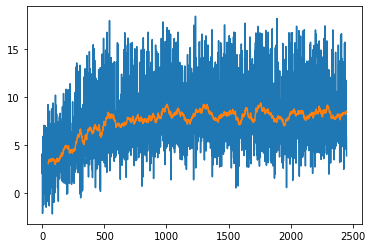

Episode: 2460 epsilon: 0.01 total score (last 10): 5.114298135731677
Episode: 2470 epsilon: 0.01 total score (last 10): 8.176110141610227
Episode: 2480 epsilon: 0.01 total score (last 10): 9.936871283415977
Episode: 2490 epsilon: 0.01 total score (last 10): 8.036198977614438
Episode: 2500 epsilon: 0.01 total score (last 10): 9.09187819724669


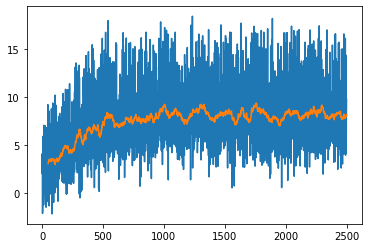

Episode: 2510 epsilon: 0.01 total score (last 10): 9.867316595574222
Episode: 2520 epsilon: 0.01 total score (last 10): 7.7434336675467
Episode: 2530 epsilon: 0.01 total score (last 10): 8.61921256900345
Episode: 2540 epsilon: 0.01 total score (last 10): 7.980927136691359
Episode: 2550 epsilon: 0.01 total score (last 10): 8.35379129246742


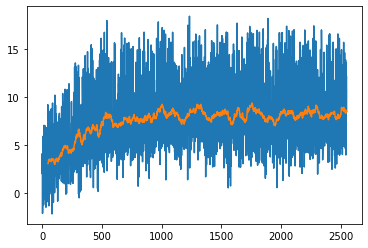

Episode: 2560 epsilon: 0.01 total score (last 10): 9.119358630382447
Episode: 2570 epsilon: 0.01 total score (last 10): 10.810002067328945
Episode: 2580 epsilon: 0.01 total score (last 10): 7.950709658038903
Episode: 2590 epsilon: 0.01 total score (last 10): 7.737853013602869
Episode: 2600 epsilon: 0.01 total score (last 10): 6.320685007152501


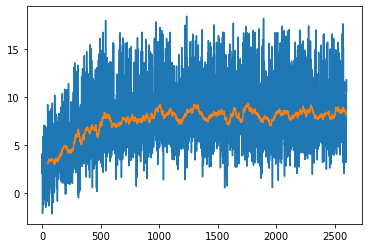

Episode: 2610 epsilon: 0.01 total score (last 10): 6.724749914372849
Episode: 2620 epsilon: 0.01 total score (last 10): 8.067913895875133
Episode: 2630 epsilon: 0.01 total score (last 10): 10.041360640285959
Episode: 2640 epsilon: 0.01 total score (last 10): 9.961537531431794
Episode: 2650 epsilon: 0.01 total score (last 10): 8.807191091910996


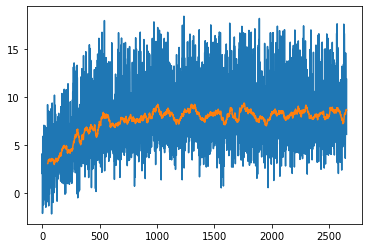

Episode: 2660 epsilon: 0.01 total score (last 10): 9.039292476835339
Episode: 2670 epsilon: 0.01 total score (last 10): 8.282617203824893
Episode: 2680 epsilon: 0.01 total score (last 10): 7.17650857470494
Episode: 2690 epsilon: 0.01 total score (last 10): 8.302916745810075
Episode: 2700 epsilon: 0.01 total score (last 10): 7.130139486993027


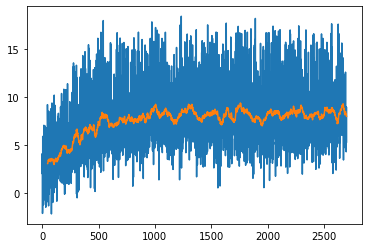

Episode: 2710 epsilon: 0.01 total score (last 10): 8.144819413863143
Episode: 2720 epsilon: 0.01 total score (last 10): 9.696985202155908
Episode: 2730 epsilon: 0.01 total score (last 10): 10.043855884890538
Episode: 2740 epsilon: 0.01 total score (last 10): 7.033145244370922
Episode: 2750 epsilon: 0.01 total score (last 10): 9.38907553015701


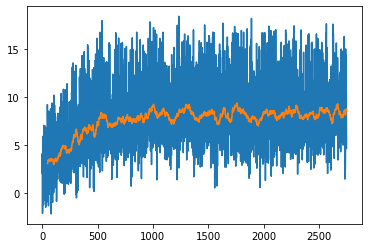

Episode: 2760 epsilon: 0.01 total score (last 10): 8.363983313997915
Episode: 2770 epsilon: 0.01 total score (last 10): 7.841413771521725
Episode: 2780 epsilon: 0.01 total score (last 10): 8.67464574089773
Episode: 2790 epsilon: 0.01 total score (last 10): 7.504839058224338
Episode: 2800 epsilon: 0.01 total score (last 10): 6.8648459898996474


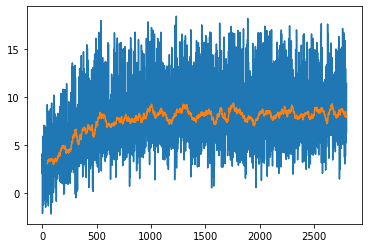

Episode: 2810 epsilon: 0.01 total score (last 10): 7.488666069045564
Episode: 2820 epsilon: 0.01 total score (last 10): 8.426736093585516
Episode: 2830 epsilon: 0.01 total score (last 10): 8.507877232246312
Episode: 2840 epsilon: 0.01 total score (last 10): 8.461086682587228
Episode: 2850 epsilon: 0.01 total score (last 10): 7.421395421400545


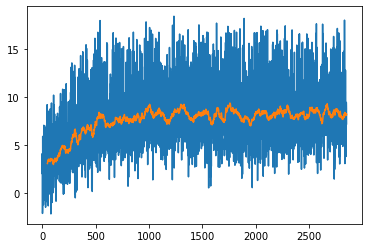

Episode: 2860 epsilon: 0.01 total score (last 10): 6.364665860439171
Episode: 2870 epsilon: 0.01 total score (last 10): 6.316041126771146
Episode: 2880 epsilon: 0.01 total score (last 10): 8.211744708662426
Episode: 2890 epsilon: 0.01 total score (last 10): 7.291090442632338
Episode: 2900 epsilon: 0.01 total score (last 10): 7.77155165524264


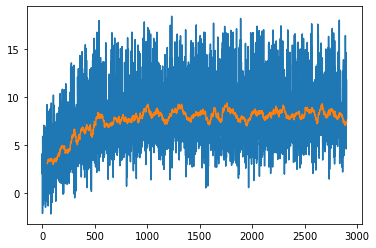

Episode: 2910 epsilon: 0.01 total score (last 10): 7.14567448814443
Episode: 2920 epsilon: 0.01 total score (last 10): 8.630203224302843
Episode: 2930 epsilon: 0.01 total score (last 10): 7.8738257140549495
Episode: 2940 epsilon: 0.01 total score (last 10): 7.047112155580701
Episode: 2950 epsilon: 0.01 total score (last 10): 10.30899650912013


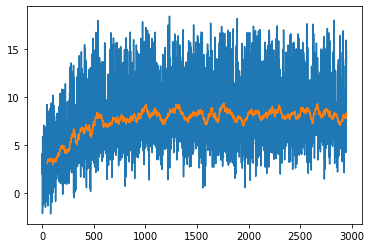

Episode: 2960 epsilon: 0.01 total score (last 10): 9.536416364602296
Episode: 2970 epsilon: 0.01 total score (last 10): 8.251353018693083
Episode: 2980 epsilon: 0.01 total score (last 10): 5.034348377926626
Episode: 2990 epsilon: 0.01 total score (last 10): 8.570466577566334


In [9]:
results = list()
total_score = list()

for episode in range(N_EPISODES):
    if episode % 10 == 0:
        print('Episode:', episode, 'epsilon:', agent.epsilon, 'total score (last 10):', np.mean(total_score[-10:-1]))
    beta_L = draw_beta_L()
    #beta_L = 2.0
    state = env.reset(parameters={'beta_L': beta_L})
    
    done, G = False, 0
    while done is False:
        
        action = agent.choose_action(state)
        _action = transform_action(action)
        new_state, reward, done, info = env.step(_action)
        scaled_reward = reward_scaler(reward, beta_L)
        
        agent.remember(state, action, scaled_reward, new_state, int(done))
        state = new_state
        agent.learn()
        
        G += scaled_reward
        results.append(create_return_array(state, _action, scaled_reward, episode))
    
    total_score.append(G)
    
    if episode % 50 == 0:
        plt.plot(total_score)
        plt.plot(pd.Series(total_score).rolling(50).mean())
        plt.show()

In [10]:
agent.save_model('models//ddqn_model')
agent.load_model('models//ddqn_model')

In [25]:
total_score_name = 'total_score_ddqn_simple_model'
with open(f'..//data//{total_score_name}.pkl', 'wb') as f:
    pickle.dump(total_score, f)

In [11]:
cols = ['Q', 'G', 'K', 'Z', 'beta_L', 'action', 'reward', 'episode']
df = pd.DataFrame(results, columns = cols)

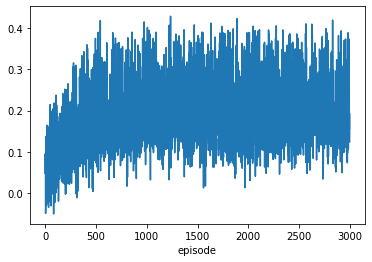

In [12]:
df.groupby('episode').mean()['reward'].plot()


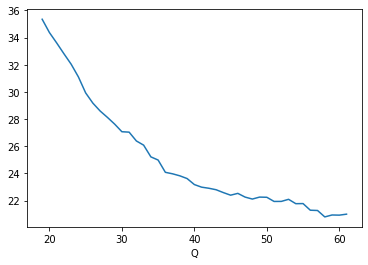

In [13]:
df.groupby('Q').mean()['action'].plot()

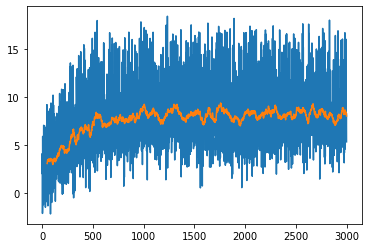

In [14]:
plt.plot(total_score)
plt.plot(pd.Series(total_score).rolling(50).mean())

Episode: 0


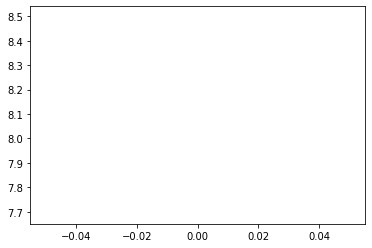

Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50


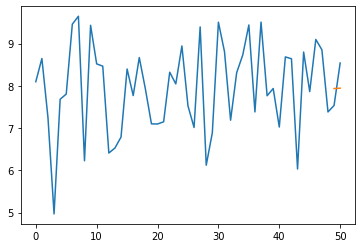

Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 100


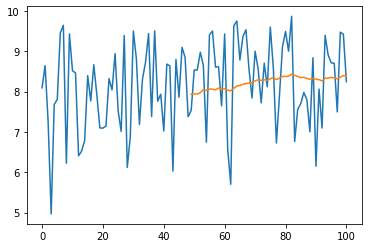

Episode: 110
Episode: 120
Episode: 130
Episode: 140
Episode: 150


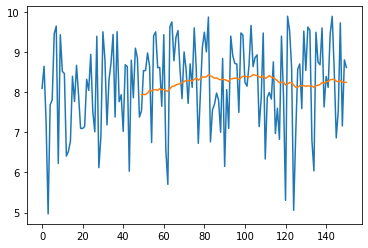

Episode: 160
Episode: 170
Episode: 180
Episode: 190


In [15]:
results_sim = list()
total_score_sim = list()

for episode in range(200):
    if episode % 10 == 0:
        print('Episode:', episode)
    beta_L = 4
    state = env.reset(parameters={'beta_L': beta_L})
    
    done, G = False, 0
    while done is False:
        
        action = agent.choose_action(state)
        _action = transform_action(action)
        new_state, reward, done, info = env.step(_action)
        scaled_reward = reward_scaler(reward, beta_L)
        agent.epsilon = 0.0
        state = new_state
        
        G += scaled_reward
        results_sim.append(create_return_array(state, _action, scaled_reward, episode))
    
    total_score_sim.append(G)
    
    if episode % 50 == 0:
        plt.plot(total_score_sim)
        plt.plot(pd.Series(total_score_sim).rolling(50).mean())
        plt.show()

In [16]:
cols = ['Q', 'G', 'K', 'Z', 'beta_L', 'action', 'reward', 'episode']
df_sim = pd.DataFrame(results_sim, columns = cols)

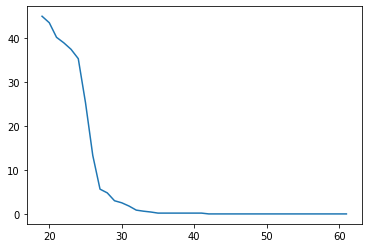

In [17]:
plt.plot(df_sim.groupby('Q').mean()['action'])

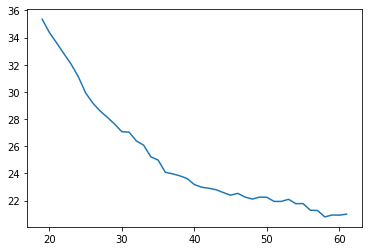

In [18]:
plt.plot(df.groupby('Q').mean()['action'])

In [19]:
np.mean(total_score[-1500:-1])

8.18016370255945

(array([ 14.,  88., 274., 462., 227., 135., 104.,  85.,  76.,  34.]),
 array([ 0.54801777,  2.31328858,  4.07855939,  5.8438302 ,  7.60910101,
         9.37437181, 11.13964262, 12.90491343, 14.67018424, 16.43545505,
        18.20072585]),
 <a list of 10 Patch objects>)

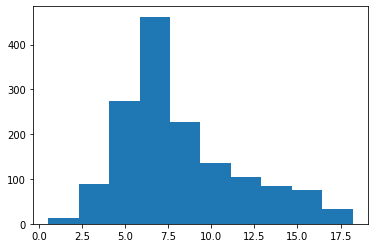

In [21]:
plt.hist(total_score[-1500:-1])

8.221790498260969


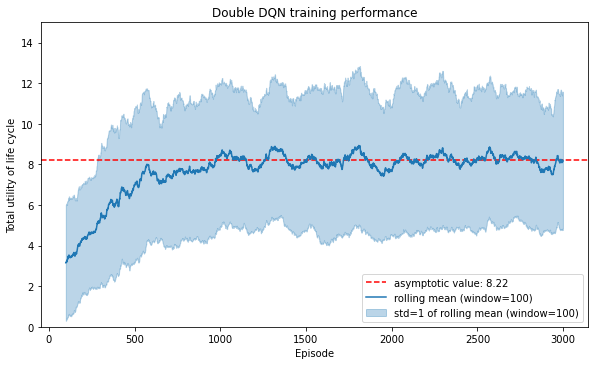

In [70]:
title, fig_scale = 'Double DQN training performance', 0.7

s = pd.Series(total_score)
f, ax = plt.subplots(1,1, figsize=(14* fig_scale, 8 * fig_scale))
ax.set_ylim(0, 15)

asymp = s.loc[2000: 3000].mean()
ax.axhline(y=asymp, color='red', ls='--', label=f'asymptotic value: {asymp:.2f}')
mean = s.rolling(100).mean()
std = s.rolling(100).std()
ax.fill_between(s.index, mean - std, mean + std, alpha=0.3, color='C0', label='std=1 of rolling mean (window=100)')
ax.plot(mean, label='rolling mean (window=100)')

ax.set_xlabel('Episode')
ax.set_ylabel('Total utility of life cycle')

ax.legend(loc='lower right')
ax.set_title(title)
print(asymp)

f.savefig('..//figures//ddqn_training_performance_simple_model')